# Exploratory Data Analysis on a Breast Cancer Survival Prediction Dataset

> Author: Diogo Silva
>
> Date: 2 August 2023

<br>

<a href="https://colab.research.google.com/github/diogo-costa-silva/eda-python-projects/blob/main/Breast%20Cancer%20Survival/breast_cancer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

We aim to deploy Exploratory Data Analysis (EDA) techniques on a dataset designed for forecasting breast cancer survival rates. By delving into this dataset, our intention is to identify and understand the different factors that impact survival rates.

Our objective is to extract essential insights to advance our understanding of breast cancer outcomes and treatment modalities. The dataset includes extensive variables such as the age of patients at the time of surgery, the year the surgery took place, the number of detected positive axillary nodes, and the survival status.

By analyzing this information, we intend to clarify the underlying data and deepen our comprehension of the prognosis and management strategies for breast cancer.

**Business Questions**

1. 

## 0. Loading the Dataset & necessary Libraries

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import plotly.express as px
import plotly.graph_objects as go
import folium as fl

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("./21239_breast_cancer_survival.csv")

In [3]:
df.head()

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
0,eca1411e,36,Married,1959,3,1.7,Yes,Yes,No,2
1,63e3301c,39,Married,1966,0,1.6,Yes,No,No,2
2,01647916,71,Single,1964,3,3.1,No,No,No,2
3,07e33840,50,Married,1960,0,3.0,Yes,No,Yes,1
4,ed75da3f,44,Married,1965,4,2.6,Yes,No,No,1


---
## 1. Data Understanding

Let's do an initial check on the dataset.

### 1.1. Shape of the DataFrame

In [4]:
df.shape

(2000, 10)

As we can see, the DataFrame has 2000 rows (records) (including the header) and 10 columns (variables).

### 1.2. Extracting the Column Names

In [5]:
# Extracting the Column Names
list(df.columns)

['Patient_ID',
 'Age',
 'Marital_Status',
 'Year of Operation',
 'Positive_Axillary_Nodes',
 'Tumor_Size',
 'Radiation_Therapy',
 'Chemotherapy',
 'Hormone_Therapy',
 'Survival_Status']

- **Patient_ID**: Identifier for the patient (categorical, non-numeric).
- **Age**: Age of the patient at the time of operation (numeric).
- **Marital_Status**: Marital status of the patient (categorical).
- **Year of Operation**: The year in which the patient underwent surgery (numeric).
- **Positive_Axillary_Nodes**: Number of positive axillary nodes detected (numeric).
- **Tumor_Size**: Size of the tumor (numeric).
- **Radiation_Therapy**: Indicates whether the patient underwent radiation therapy (categorical).
- **Chemotherapy**: Indicates whether the patient underwent chemotherapy (categorical).
- **Hormone_Therapy**: Indicates whether the patient underwent hormone therapy (categorical).
- **Survival_Status**: Indicates the survival status of the patient (numeric, possibly categorical if it represents different survival statuses).

### 1.3. Checking if there are null values

In [6]:
df.isnull().sum()

Patient_ID                 0
Age                        0
Marital_Status             0
Year of Operation          0
Positive_Axillary_Nodes    0
Tumor_Size                 0
Radiation_Therapy          0
Chemotherapy               0
Hormone_Therapy            0
Survival_Status            0
dtype: int64

### 1.4. Information about the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Age                      2000 non-null   int64  
 2   Marital_Status           2000 non-null   object 
 3   Year of Operation        2000 non-null   int64  
 4   Positive_Axillary_Nodes  2000 non-null   int64  
 5   Tumor_Size               2000 non-null   float64
 6   Radiation_Therapy        2000 non-null   object 
 7   Chemotherapy             2000 non-null   object 
 8   Hormone_Therapy          2000 non-null   object 
 9   Survival_Status          2000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 156.4+ KB


The info() function is able to give us a set of important information to better understand the content of the dataset.
Thus, the data we are analysing has no null values in any of the columns, since the count of non-null values corresponds to the total number of records in the dataset. As for the data types in each column, I think there are some variables that need checking:
- Patient_ID is object but should be int64;
- Radiation_Therapy, Chemotherapy and Hormone_Therapy are objects but should be boolean.

### 1.5. Let's find the number of unique values corresponding to each column

In [8]:
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f'Number of unique values in {column}: {num_unique_values}')

Number of unique values in Patient_ID: 2000
Number of unique values in Age: 54
Number of unique values in Marital_Status: 2
Number of unique values in Year of Operation: 12
Number of unique values in Positive_Axillary_Nodes: 52
Number of unique values in Tumor_Size: 46
Number of unique values in Radiation_Therapy: 2
Number of unique values in Chemotherapy: 2
Number of unique values in Hormone_Therapy: 2
Number of unique values in Survival_Status: 2


## 2. Descriptive Statistical Analysis

Let's do a descriptive statistical analysis using the describe() function. By setting the 'include' attribute to 'all', we ensure that the analysis encompasses both numerical and categorical features.

In [9]:
df.describe(include="all")

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
count,2000,2000.00000,2000,2000.000000,2000.000000,2000.000000,2000,2000,2000,2000.000000
unique,2000,NaN,2,NaN,NaN,NaN,2,2,2,NaN
top,eca1411e,NaN,Married,NaN,NaN,NaN,Yes,No,No,NaN
freq,1,NaN,1408,NaN,NaN,NaN,1604,1370,1822,NaN
mean,NaN,56.95400,NaN,1963.442000,9.667000,2.764100,NaN,NaN,NaN,1.509000
std,NaN,15.44779,NaN,3.388123,10.407366,1.321701,NaN,NaN,NaN,0.500044
min,NaN,30.00000,NaN,1958.000000,0.000000,0.500000,NaN,NaN,NaN,1.000000
25%,NaN,44.00000,NaN,1961.000000,3.000000,1.600000,NaN,NaN,NaN,1.000000
50%,NaN,57.00000,NaN,1963.000000,6.000000,2.700000,NaN,NaN,NaN,2.000000
75%,NaN,70.00000,NaN,1966.000000,13.000000,3.900000,NaN,NaN,NaN,2.000000


Insights:

## 3. Data Cleaning

Data often comes with different types of quality problems, underscoring the importance of cleansing your dataset. A cluttered dataset, much like a cluttered space, can negatively impact your analysis, leading to erroneous conclusions. Hence, rectifying these problems is a prerequisite for conducting reliable data analysis.

Since we don't have any null values in the dataset, we save some work in this pre-processing phase.

### 3.1. Removing Irrelevant Features

Some attributes may be extraneous and not contribute to the analysis, warranting their removal.
For example, if 'Patient_ID' in our dataset does not offer any predictive insight regarding the target variable, it can be omitted.

In [10]:
df = df.drop('Patient_ID', axis=1)

### 3.2. Removing Duplicate Rows

Eliminating duplicates is crucial in data cleaning to remove redundant information, ensuring dataset integrity. Here's a method for detecting and eradicating duplicate rows or observations within a dataset:

In [11]:
df.duplicated().sum()

1

In [12]:
duplicates = df[df.duplicated()]
duplicates

,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
1008,41,Single,1967,7,4.5,Yes,No,No,1


In [13]:
# Removing duplicate rows and updating the DataFrame
df_cleaned = df.drop_duplicates()

## 4.Outlier Detection

Outliers are atypical data points that differ significantly from the main dataset trend, especially common in medical data as they can signal rare conditions.

Identifying these outliers is vital for in-depth analysis, as they can impact statistical metrics and reveal insights about medical complexities.

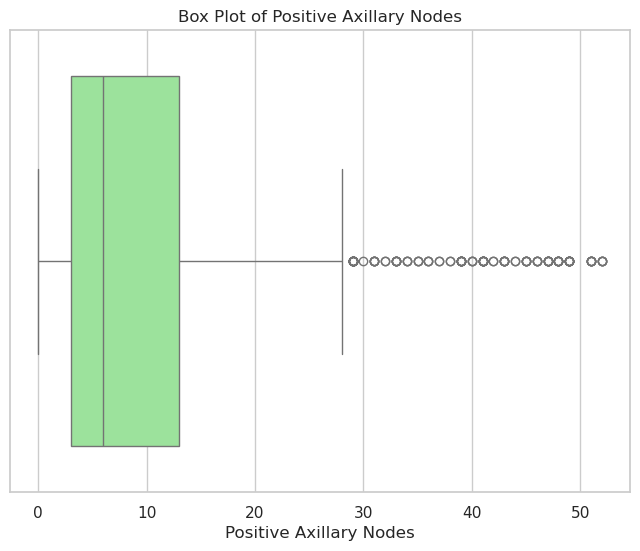

In [14]:
# Set the style
sns.set(style="whitegrid")

# Create a box plot for 'Positive_Axillary_Nodes'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Positive_Axillary_Nodes'], color='lightgreen')
plt.title('Box Plot of Positive Axillary Nodes')
plt.xlabel('Positive Axillary Nodes')
plt.show()

In [15]:
# Select only the numeric columns from the dataframe
numeric_df = df.select_dtypes(include=['number'])

# Compute the quantiles and IQR for the numeric data
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
print(outliers)

0       False
1       False
2       False
3       False
4       False
        ...  
1995     True
1996     True
1997     True
1998     True
1999     True
Length: 2000, dtype: bool


In [16]:
from scipy.stats import zscore

z_scores = zscore(numeric_df)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

print(outliers)

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool


## 5. Data Visualisations

### 5.1. Univariate analysis

Univariate analysis focuses on the distribution and characteristics of a single variable, facilitating the identification of patterns, summarization, and statistical examination. The selection of a visualization method is dictated by the type of data: 

- **bar charts** are used for <u>discrete</u> variables
- **histograms** for <u>continuous</u> variables
- **pie charts** for <u>categorizing</u> data

#### 5.1.1. What is the distribution of <u>positive axillary nodes</u> in the patients?

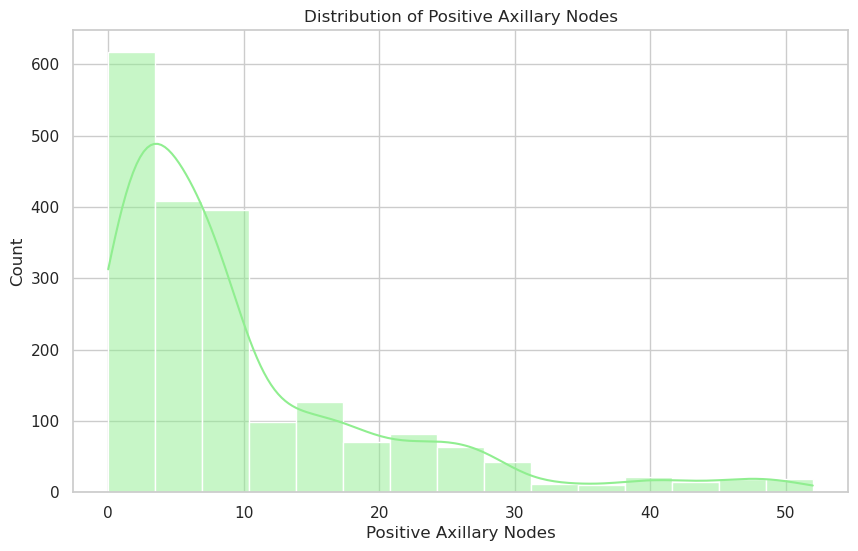

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Positive_Axillary_Nodes'], bins=15, kde=True, color='lightgreen')
plt.title('Distribution of Positive Axillary Nodes')
plt.xlabel('Positive Axillary Nodes')
plt.ylabel('Count')
plt.show()

The data demonstrates a **left-skewed distribution**, primarily clustering around a mode of approximately 0 positive axillary nodes. There are several outliers stretching towards the higher spectrum, reaching up to 50 positive axillary nodes. The elongation of the distribution's left tail over the right indicates a greater frequency of data points with fewer positive axillary nodes compared to those with higher counts.

#### 5.1.2. How is the dataset distributed across different <u>marital statuses</u>, and what percentage of patients belong to each category?

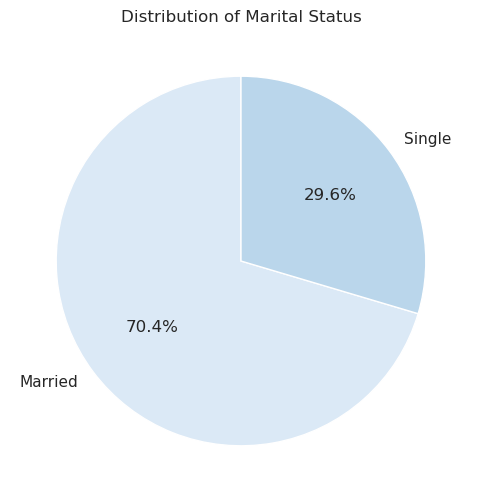

In [18]:
marital_counts = df['Marital_Status'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))
plt.title('Distribution of Marital Status')
plt.show()

There are 70.4% of **married** people and 29.6% of **single** people in our dataset.

#### 5.1.3. What is the **cumulative distribution** of <u>age</u> groups in the Cancer Survival Prediction dataset, and how does it illustrate the overall distribution of patients across different age groups?

In [19]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(df['Age_Group'], color='purple')
plt.title('Cumulative Distribution of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Cumulative Probability')
plt.show()

KeyError: 'Age_Group'

<Figure size 1000x600 with 0 Axes>

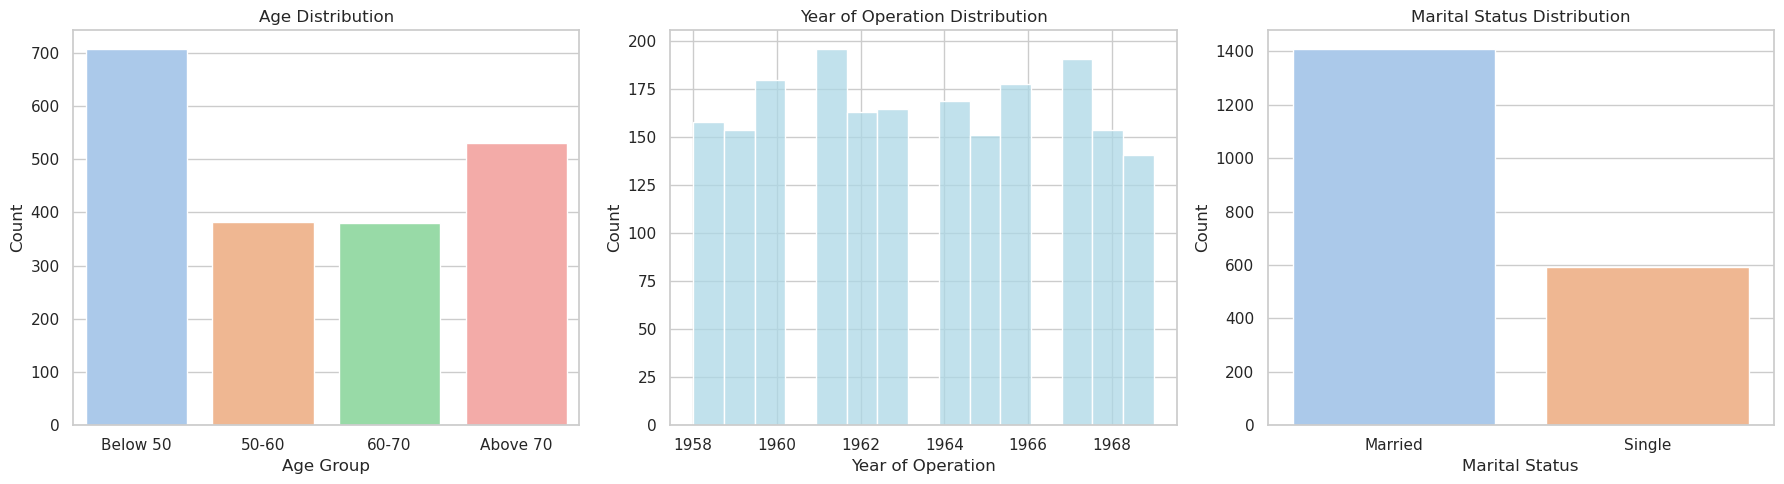

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# 1. Age Distribution
age_bins = [0, 50, 60, 70, 100]  
age_labels = ['Below 50', '50-60', '60-70', 'Above 70']  # Label for each age group
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
sns.countplot(x='Age_Group', data=df, ax=axes[0], hue='Age_Group', palette='pastel', legend=False)
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

# 2. Year of Operation Distribution
sns.histplot(df['Year of Operation'], bins=15, kde=False, ax=axes[1], color='lightblue')
axes[1].set_title('Year of Operation Distribution')
axes[1].set_xlabel('Year of Operation')
axes[1].set_ylabel('Count')

# 3. Marital Status Distribution
sns.countplot(x='Marital_Status', data=df, ax=axes[2], hue='Marital_Status', palette='pastel', legend=False)
axes[2].set_title('Marital Status Distribution')
axes[2].set_xlabel('Marital Status')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

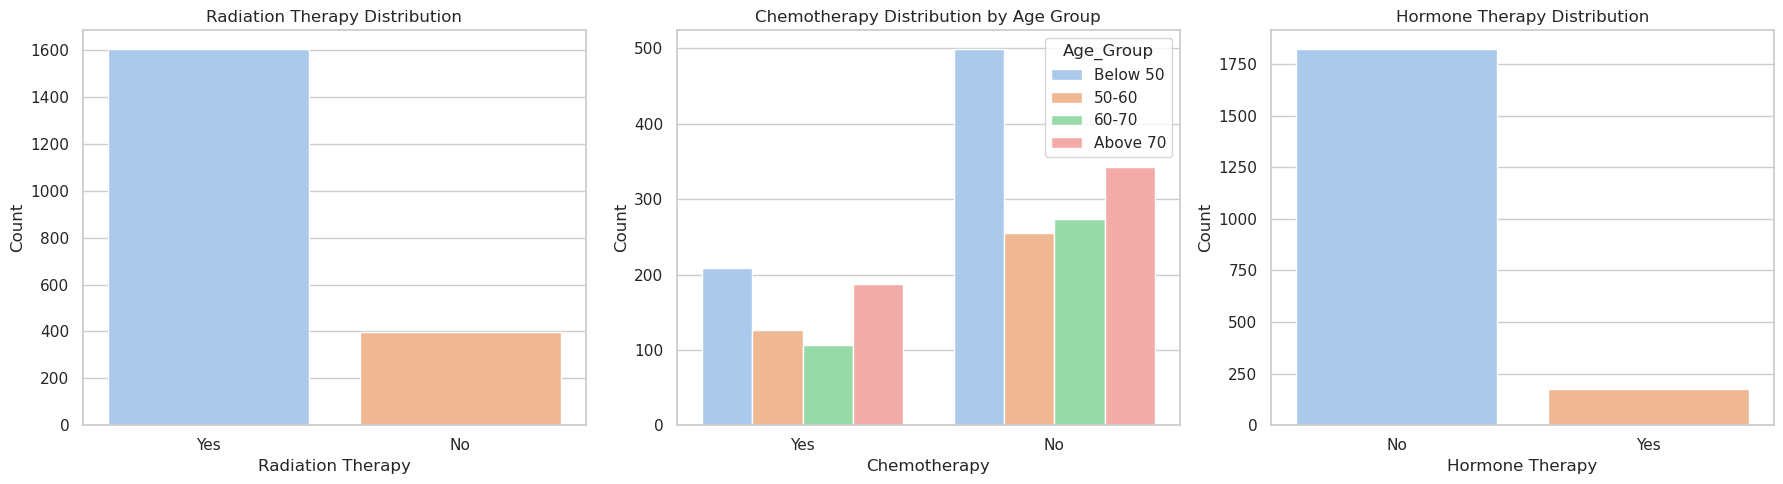

In [21]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# 4. Radiation Therapy Distribution
sns.countplot(x='Radiation_Therapy', data=df, ax=axes[0], hue='Radiation_Therapy', palette='pastel', legend=False)
axes[0].set_title('Radiation Therapy Distribution')
axes[0].set_xlabel('Radiation Therapy')
axes[0].set_ylabel('Count')

# 5. Chemotherapy Distribution by Age Group
sns.countplot(x='Chemotherapy', data=df, hue='Age_Group', ax=axes[1], palette='pastel')
axes[1].set_title('Chemotherapy Distribution by Age Group')
axes[1].set_xlabel('Chemotherapy')
axes[1].set_ylabel('Count')

# 6. Hormone Therapy Distribution
sns.countplot(x='Hormone_Therapy', data=df, ax=axes[2], hue='Hormone_Therapy', palette='pastel', legend=False)
axes[2].set_title('Hormone Therapy Distribution')
axes[2].set_xlabel('Hormone Therapy')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


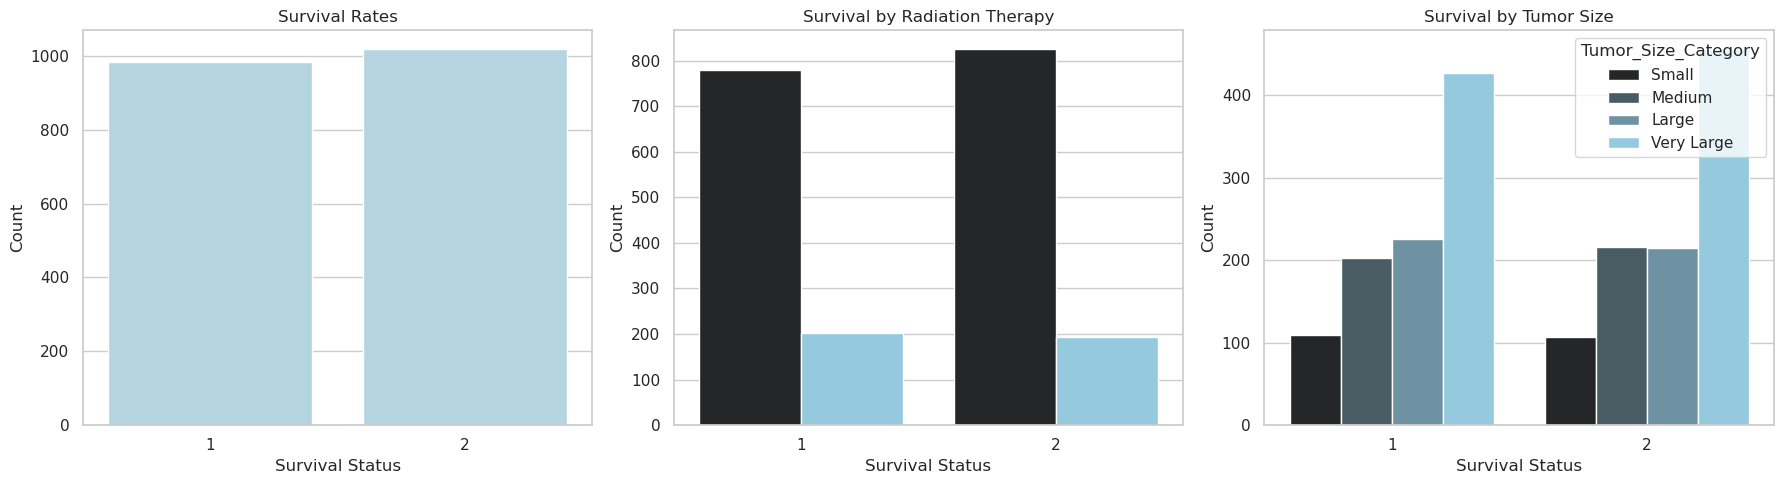

In [22]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# 7. Survival Rates
sns.countplot(x='Survival_Status', data=df, ax=axes[0], color='lightblue')  # Use color instead of palette
axes[0].set_title('Survival Rates')
axes[0].set_xlabel('Survival Status')
axes[0].set_ylabel('Count')
axes[0].legend().set_visible(False)  # Hide legend for the first plot

# 8. Survival by Treatment
sns.countplot(x='Survival_Status', data=df, hue='Radiation_Therapy', ax=axes[1], palette='dark:skyblue')  # Use palette instead of color
axes[1].set_title('Survival by Radiation Therapy')
axes[1].set_xlabel('Survival Status')
axes[1].set_ylabel('Count')
axes[1].legend().set_visible(False)  # Hide legend for the second plot

# 9. Survival by Tumor Size
tumor_size_bins = [0, 1, 2, 3, 5]  # Define tumor size ranges
tumor_size_labels = ['Small', 'Medium', 'Large', 'Very Large']  # Label for each tumor size range
df['Tumor_Size_Category'] = pd.cut(df['Tumor_Size'], bins=tumor_size_bins, labels=tumor_size_labels, right=False)
sns.countplot(x='Survival_Status', data=df, hue='Tumor_Size_Category', ax=axes[2], palette='dark:skyblue')  # Use palette instead of color
axes[2].set_title('Survival by Tumor Size')
axes[2].set_xlabel('Survival Status')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

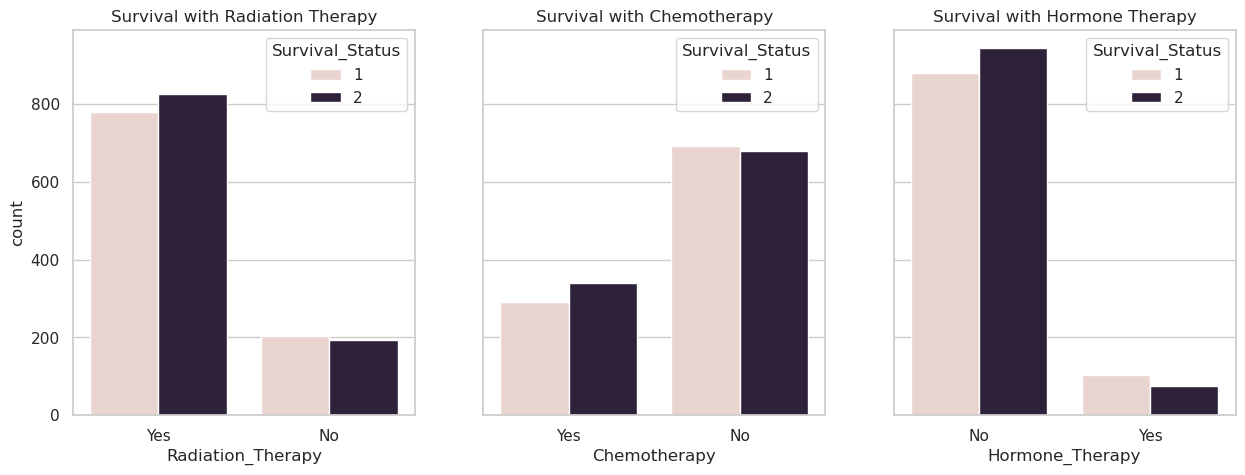

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# 9. Survival with Radiation Therapy
sns.countplot(x='Radiation_Therapy', hue='Survival_Status', data=df, ax=axes[0])
axes[0].set_title('Survival with Radiation Therapy')

# 10. Survival with Chemotherapy
sns.countplot(x='Chemotherapy', hue='Survival_Status', data=df, ax=axes[1])
axes[1].set_title('Survival with Chemotherapy')

# 11. Survival with Hormone Therapy
sns.countplot(x='Hormone_Therapy', hue='Survival_Status', data=df, ax=axes[2])
axes[2].set_title('Survival with Hormone Therapy')

plt.show()

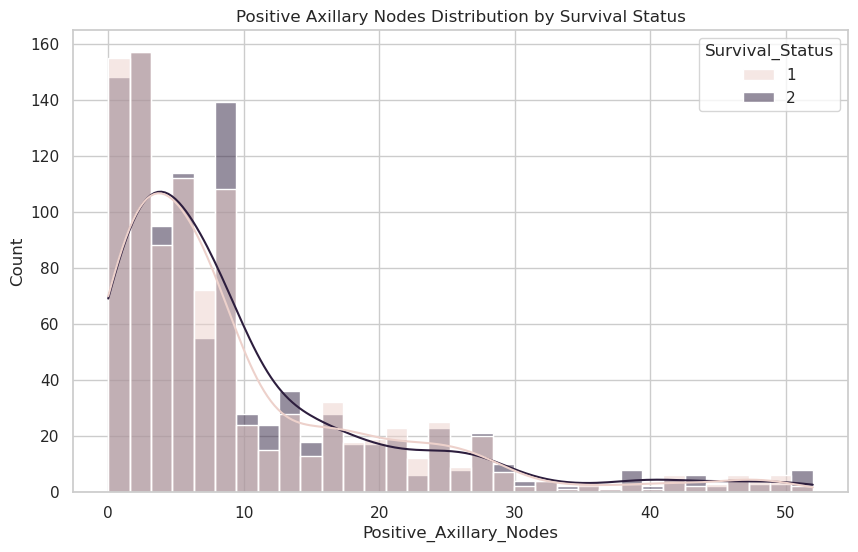

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Positive_Axillary_Nodes', hue='Survival_Status', data=df, kde=True)
plt.title('Positive Axillary Nodes Distribution by Survival Status')
plt.show()

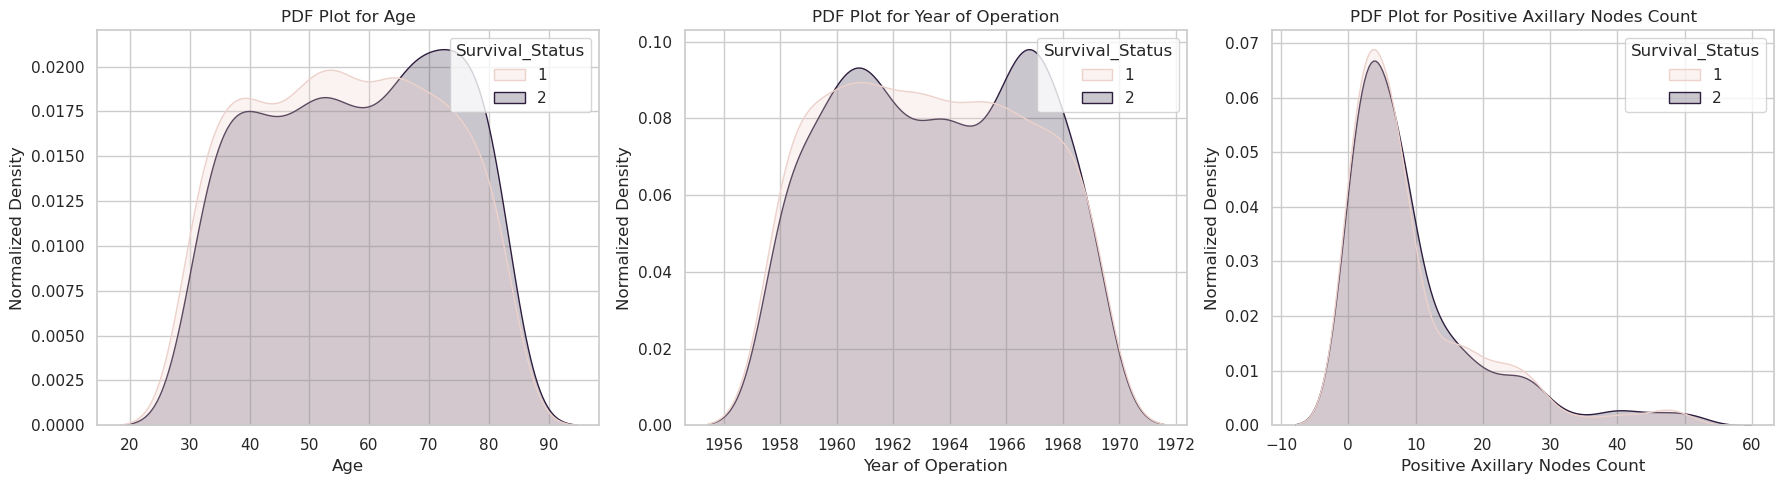

In [25]:
# Set the style
sns.set(style="whitegrid")

# Plotting PDF plots for each variable
plt.figure(figsize=(18, 5))

# Probability Density Function (PDF) plots for Age
plt.subplot(1, 3, 1)
sns.kdeplot(data=df, x='Age', hue='Survival_Status', fill=True, common_norm=False)
plt.title('PDF Plot for Age')
plt.xlabel('Age')
plt.ylabel('Normalized Density')

# Probability Density Function (PDF) plots for Year of Operation
plt.subplot(1, 3, 2)
sns.kdeplot(data=df, x='Year of Operation', hue='Survival_Status', fill=True, common_norm=False)
plt.title('PDF Plot for Year of Operation')
plt.xlabel('Year of Operation')
plt.ylabel('Normalized Density')

# Probability Density Function (PDF) plots for Positive Axillary Nodes Count
plt.subplot(1, 3, 3)
sns.kdeplot(data=df, x='Positive_Axillary_Nodes', hue='Survival_Status', fill=True, common_norm=False)
plt.title('PDF Plot for Positive Axillary Nodes Count')
plt.xlabel('Positive Axillary Nodes Count')
plt.ylabel('Normalized Density')

# Adjust layout
plt.tight_layout()
plt.show()

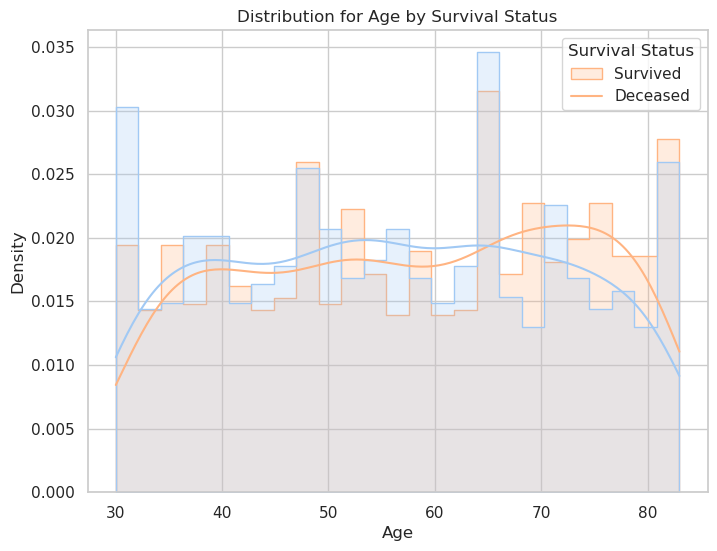

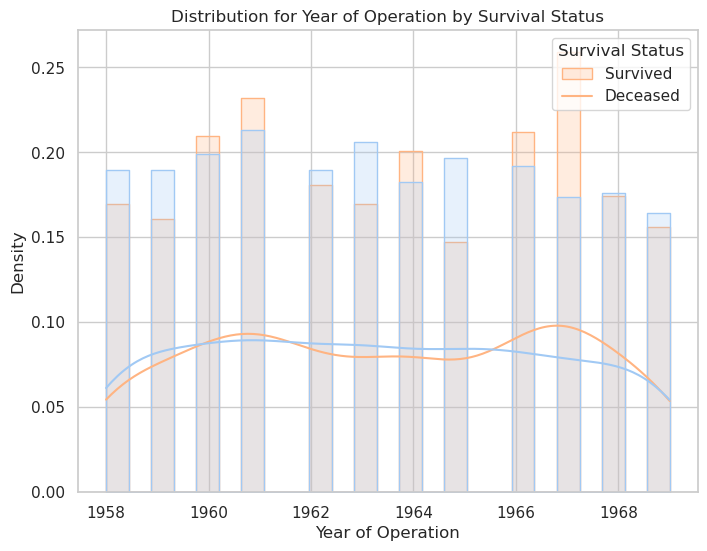

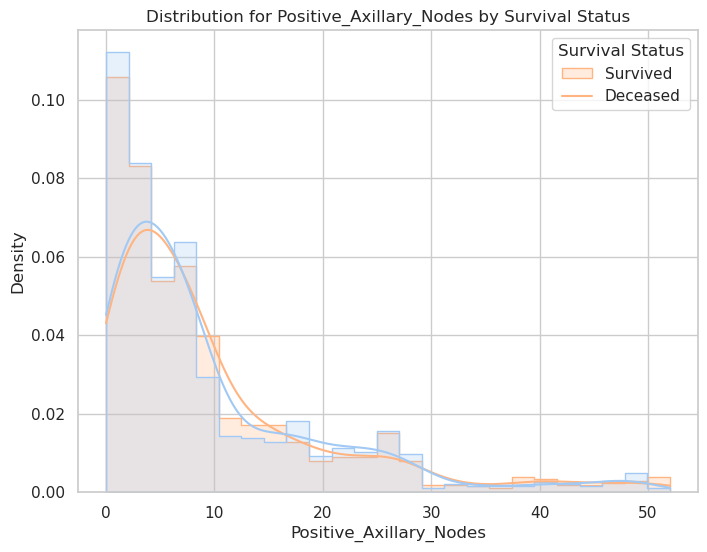

In [26]:
# Set the style
sns.set(style="whitegrid")

# Features of interest
selected_features = ['Age', 'Year of Operation', 'Positive_Axillary_Nodes']

# Plotting combined KDE with histograms for selected features
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='Survival_Status', kde=True, bins=25, palette='pastel', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution for {feature} by Survival Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Survival Status', labels=['Survived', 'Deceased'])
    plt.show()

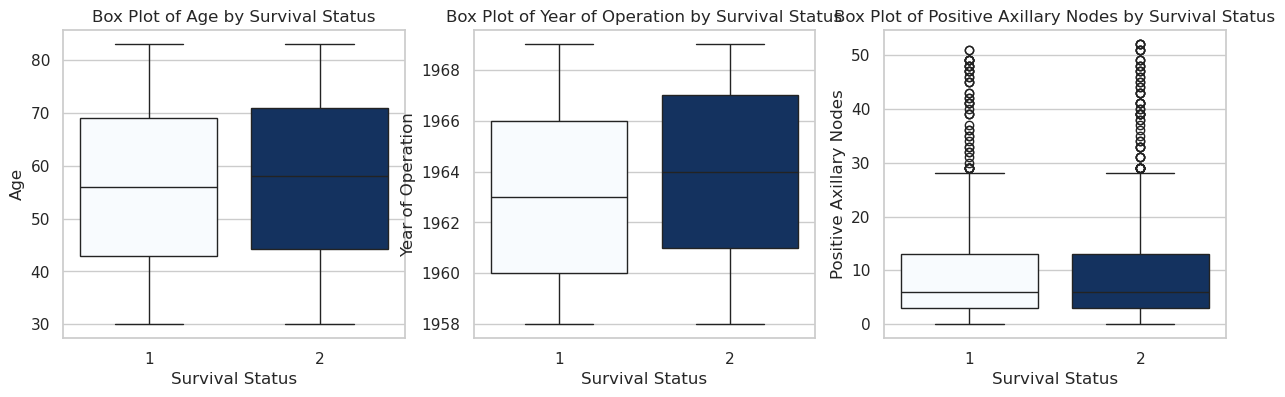

In [27]:
plt.figure(figsize=(15, 4))

# Subplot 1
plt.subplot(1, 3, 1)
sns.boxplot(x='Survival_Status', y='Age', data=df, hue='Survival_Status', palette='Blues', legend=False)
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.title('Box Plot of Age by Survival Status')

# Subplot 2
plt.subplot(1, 3, 2)
sns.boxplot(x='Survival_Status', y='Year of Operation', data=df, hue='Survival_Status', palette='Blues', legend=False)
plt.xlabel('Survival Status')
plt.ylabel('Year of Operation')
plt.title('Box Plot of Year of Operation by Survival Status')

# Subplot 3
plt.subplot(1, 3, 3)
sns.boxplot(x='Survival_Status', y='Positive_Axillary_Nodes', data=df, hue='Survival_Status', palette='Blues', legend=False)
plt.xlabel('Survival Status')
plt.ylabel('Positive Axillary Nodes')
plt.title('Box Plot of Positive Axillary Nodes by Survival Status')

plt.show()

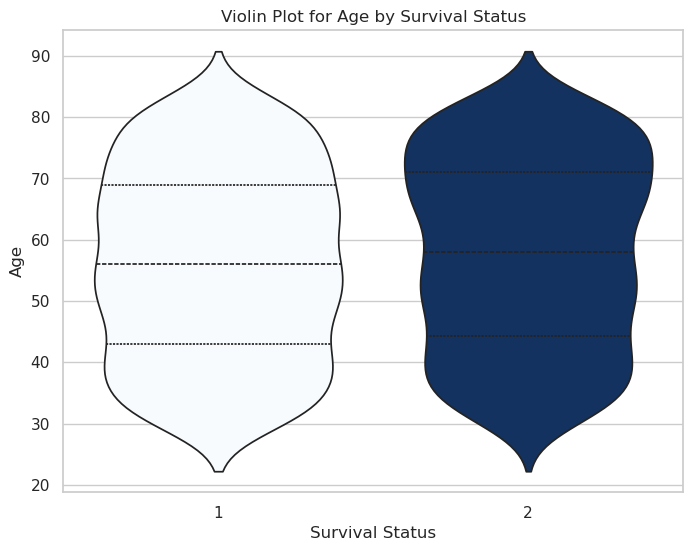

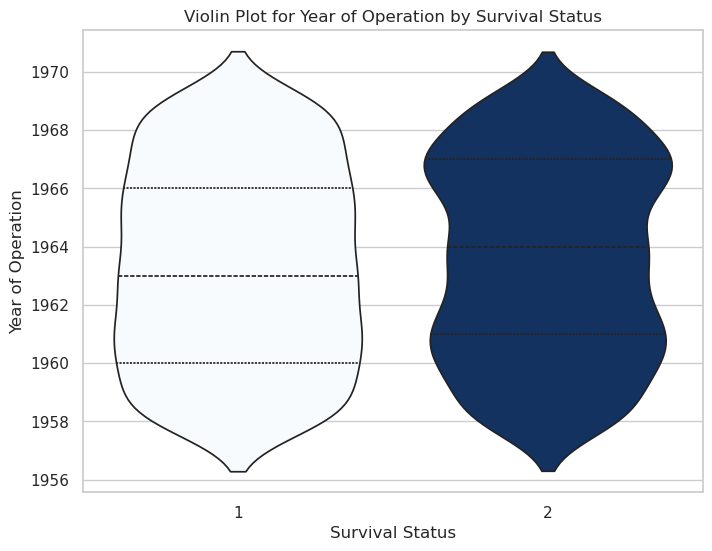

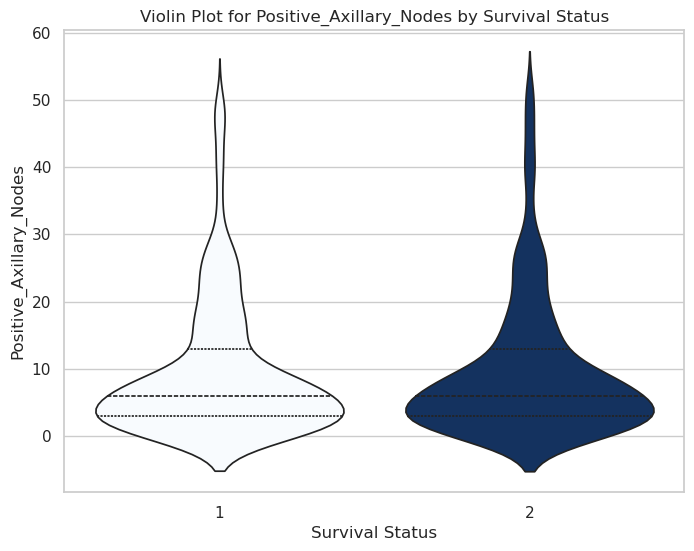

In [28]:
# Features of interest
selected_features = ['Age', 'Year of Operation', 'Positive_Axillary_Nodes']

# Plotting violin plots for selected features
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Survival_Status', y=feature, data=df, hue='Survival_Status', palette='Blues', inner='quartile', legend=False)
    plt.title(f'Violin Plot for {feature} by Survival Status')
    plt.xlabel('Survival Status')
    plt.ylabel(feature)
    plt.show()

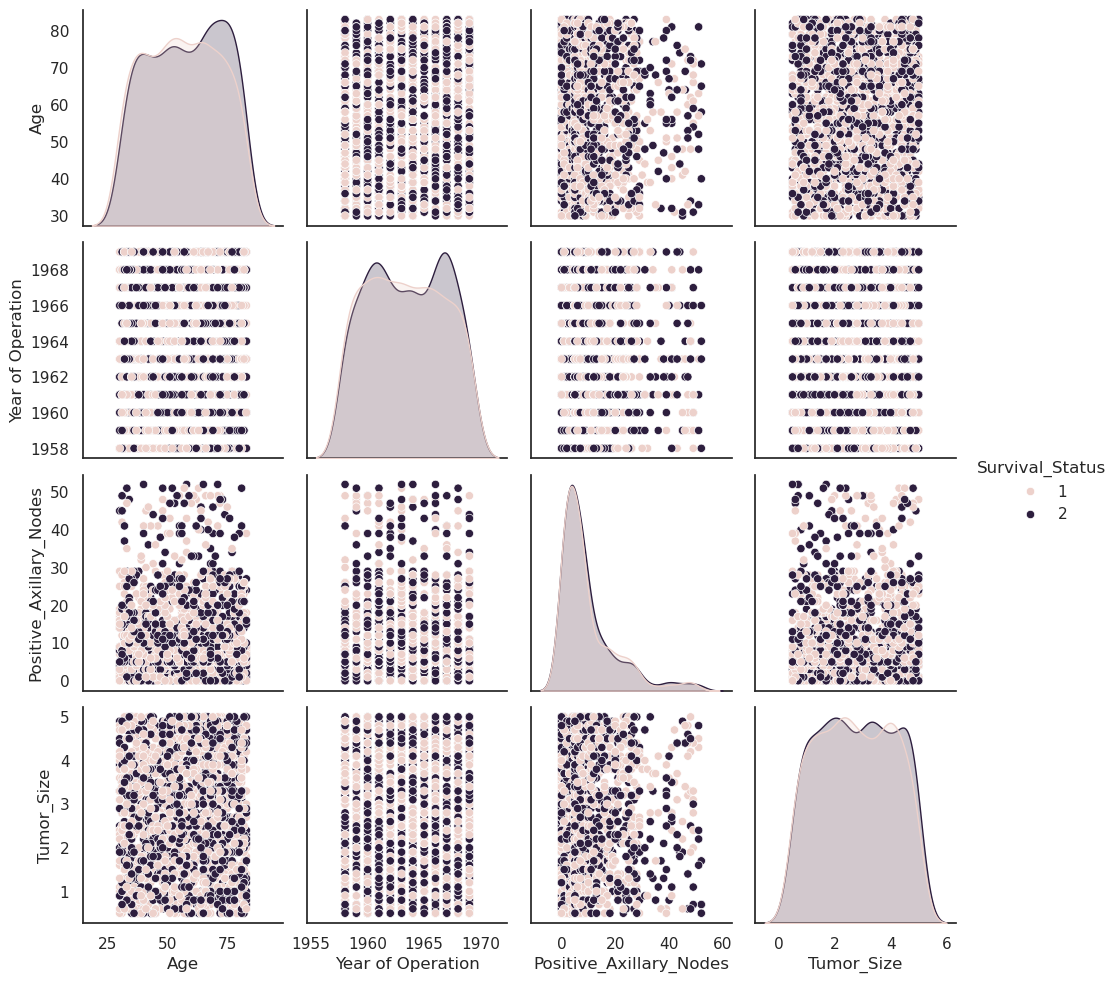

In [29]:
sns.set_style('white') 
sns.pairplot(df, hue='Survival_Status')
plt.show()

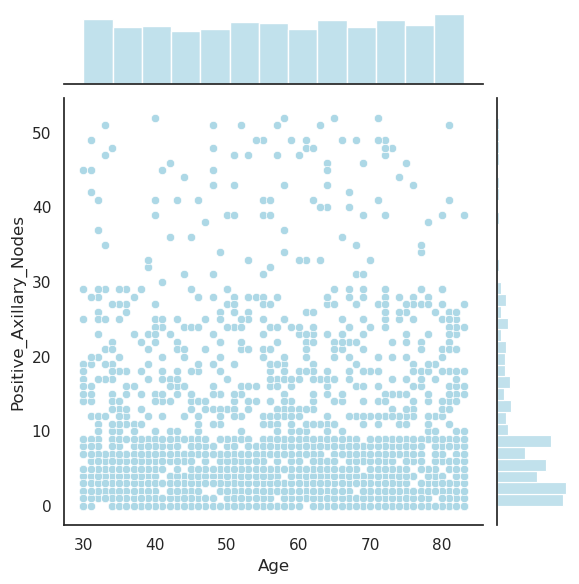

In [30]:
sns.jointplot(x='Age', y='Positive_Axillary_Nodes', data=df,color='lightblue')
plt.show()

### 5.2. Bivariate and Multivariate analysis

Bivariate analysis investigates the relationships between two variables, employing scatter plots to observe associations, line charts to detect trends, box plots to view distributions, and heatmaps to discern correlations. These visual tools are essential for revealing links and dependencies within the data.

Multivariate analysis extends beyond, analyzing the interactions among multiple variables simultaneously. Methods such as Principal Component Analysis and Cluster Analysis allow for a comprehensive examination of complex datasets by evaluating several factors together. In essence, both bivariate and multivariate analyses serve as invaluable methods for deriving insights from varied data contexts.

#### 5.2.1. Heatmap

To delve deeper into the dataset and comprehend the interrelations among various features, correlation analysis is beneficial. Heatmaps serve as effective instruments for illustrating the correlations between feature variables within a dataset, enabling an easy identification of patterns and interdependencies, particularly useful in regression analysis or statistical modeling.

Within a correlation matrix, each cell signifies the correlation coefficient between two distinct variables, with values spanning from -1 to 1:

- A value of 1 represents a perfect positive correlation, meaning as one variable escalates, the other does similarly.
- A value of -1 denotes a perfect negative correlation, indicating that as one variable increases, the other diminishes.
- A value of 0 suggests no correlation between the variables.

In [31]:
# Compute correlation matrix
corr_matrix = df.corr()

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', square=True)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Married'

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Convert object-type columns to numerical representations
df['Radiation_Therapy'] = label_encoder.fit_transform(df['Radiation_Therapy'])
df['Chemotherapy'] = label_encoder.fit_transform(df['Chemotherapy'])
df['Hormone_Therapy'] = label_encoder.fit_transform(df['Hormone_Therapy'])

In [ ]:
df['Marital_Status'] = df['Marital_Status'].astype('category').cat.codes

In [ ]:
# Dropping unwanted columns
columns_to_drop = ['Age_Group', 'Tumor_Size_Category']
df = df.drop(columns=columns_to_drop)

# Verifying the changes
print(df.head())

In [ ]:
# Create a sample correlation matrix
corr_matrix = pd.DataFrame(df).corr()

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Scatter plot
plt.figure(figsize=(7, 6))
sns.scatterplot(x='Tumor_Size', y='Positive_Axillary_Nodes', data=df, hue='Survival_Status', palette='pastel')
plt.title('Scatter Plot: Tumor_Size vs. Positive_Axillary_Nodes')
plt.xlabel('Tumor Size')
plt.ylabel('Positive Axillary Nodes')
plt.legend(title='Survival Status', labels=['Survived', 'Deceased'])
plt.show()

In [ ]:
sns.jointplot(x = 'Age',  y = 'Year of Operation' , data = df,  kind = 'kde', fill = True)
plt.show()